In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data

In [68]:
df = data.sf_temps()

In [69]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [70]:
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,temp,date,month,day,weekday
0,47.8,2010-01-01 00:00:00,1,1,Friday
1,47.4,2010-01-01 01:00:00,1,1,Friday
2,46.9,2010-01-01 02:00:00,1,1,Friday
3,46.5,2010-01-01 03:00:00,1,1,Friday
4,46.0,2010-01-01 04:00:00,1,1,Friday


Avg Daily Temperature Over Time

In [71]:
df = df.set_index('date').sort_index()

In [72]:
daily_df = df.resample('D').mean()

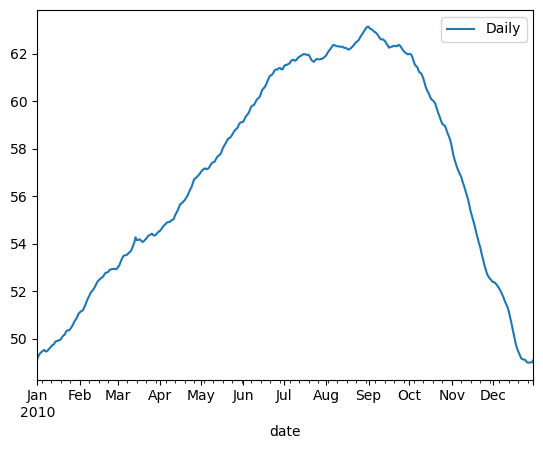

In [73]:
daily_df.temp.plot(label='Daily')
plt.legend()
plt.show()

Min temp over time

In [74]:
daily_df = df.resample('D').min()

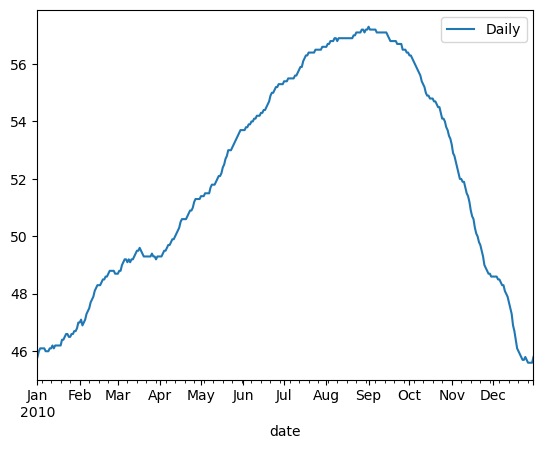

In [75]:
daily_df.temp.plot(label='Daily')
plt.legend()
plt.show()

Max temp over time

In [76]:
daily_df = df.resample('D').max()

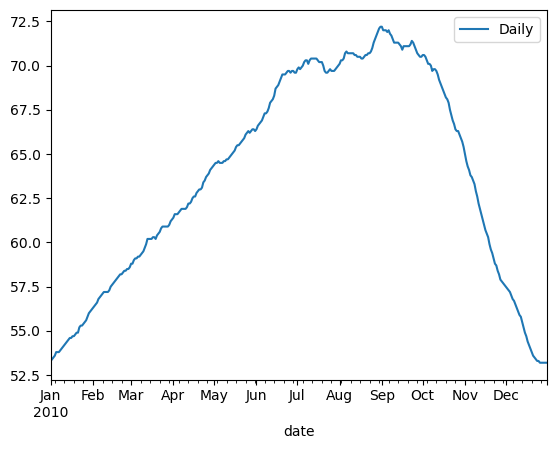

In [77]:
daily_df.temp.plot(label='Daily')
plt.legend()
plt.show()

Coldest month on average

In [78]:
monthly_df = df.resample('M').mean()

In [79]:
monthly_df[monthly_df.temp == monthly_df.temp.min()]

,temp,month,day
date,,,
2010-01-31,49.98414,1.0,16.0


Month with the highest average temp

In [80]:
monthly_df[monthly_df.temp == monthly_df.temp.max()]

,temp,month,day
date,,,
2010-09-30,62.487083,9.0,15.5


Resample by day and calculate min and max temp for the day. Which month has the highest daily variablity?

In [81]:
daily_df = df.resample('D').agg(['min', 'max'])

In [86]:
daily_df.head()

temp       month     day       weekday          
             min   max   min max min max       min       max
date                                                        
2010-01-01  45.8  53.3     1   1   1   1    Friday    Friday
2010-01-02  46.0  53.4     1   1   2   2  Saturday  Saturday
2010-01-03  46.1  53.5     1   1   3   3    Sunday    Sunday
2010-01-04  46.1  53.6     1   1   4   4    Monday    Monday
2010-01-05  46.1  53.8     1   1   5   5   Tuesday   Tuesday

In [87]:
# Calculate the change in temperature for each day
daily_df['temp_diff'] = daily_df[('temp', 'max')] - daily_df[('temp', 'min')]

In [89]:
monthly_df['temp_diff'] = daily_df.temp_diff.resample('M').mean()

In [91]:
monthly_df[monthly_df.temp_diff == monthly_df.temp_diff.max()]

,temp,month,day,temp_diff
date,,,,
2010-09-30,62.487083,9.0,15.5,14.403333


# Seattle

In [111]:
df = data.seattle_weather()

In [112]:
df.head(1)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle


In [113]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [105]:
#df = df.set_index('date').sort_index()

Which year and month combination has the highest amount of precipitation?

In [114]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by year and month, and calculate the total precipitation
monthly_precipitation = df.groupby([df['date'].dt.year, df['date'].dt.month])['precipitation'].sum()

# Find the year and month combination with the highest precipitation
max_precipitation_year_month = monthly_precipitation.idxmax()

print(f"The year and month combination with the highest amount of precipitation is {max_precipitation_year_month}")

The year and month combination with the highest amount of precipitation is (2015, 12)


Visualize the amount of monthly precipitation over time.

In [106]:
monthly_df = df.resample('M').mean()

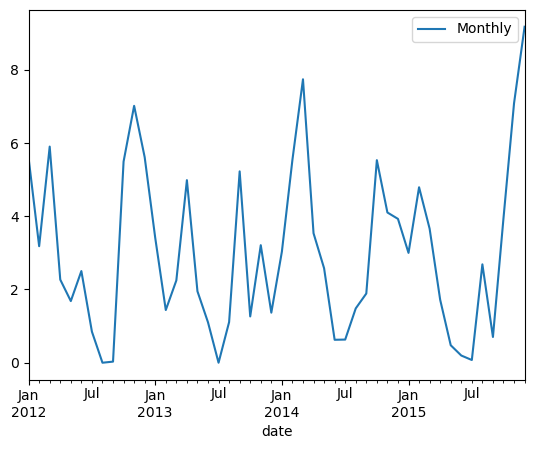

In [107]:
monthly_df.precipitation.plot(label='Monthly')
plt.legend()
plt.show()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

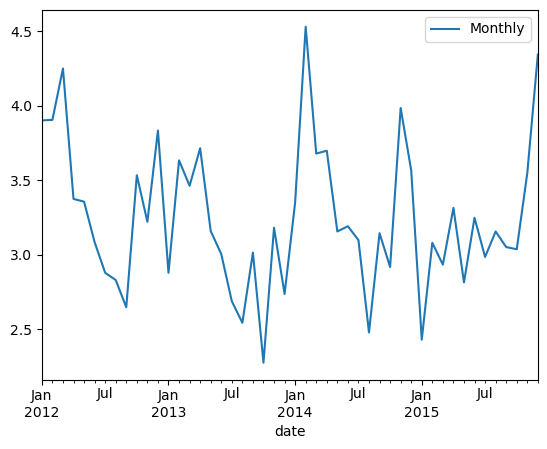

In [108]:
monthly_df.wind.plot(label='Monthly')
plt.legend()
plt.show()

Which year-month combination is the windiest?

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In which month does it rain the most?

Which month has the most number of days with a non-zero amount of precipitation?